# Purpose of this notebook is get the data from school crime and real estate to let the family know which place in Austin is Best for them to move

In [1]:
#define the Headers 
import folium
import pandas as pd
import numpy as np
import vincent
import branca
import matplotlib.pyplot as plt

### Get the school ratings from CSV

In [2]:
schools_df = pd.read_csv('data_sources\Schooldata.csv')
schools_df["gsRating"] = schools_df[["gsRating"]].apply(pd.to_numeric)

schools_df = schools_df.drop(['Unnamed: 0'], axis=1)
schools_df= schools_df.dropna(how='all')
schools_df[schools_df['Zipcode'] == 78751.0]


,gsId,name,city,state,address,lat,lon,type,gsRating,Zipcode
3,18793.0,AHB Community School,Austin,TX,"4001 Speedway Ave, \r\nAustin, TX 78751",30.303180,-97.731610,private,NaN,78751.0
118,11581.0,Griffin School,Austin,TX,"5001 Evans Ave., \r\nAustin, TX 78751",30.312716,-97.719710,private,NaN,78751.0
129,18838.0,Helping Hand,Austin,TX,"3804 Avenue B, \r\nAustin, TX 78751",30.302364,-97.736450,charter,NaN,78751.0
144,8339.0,Hyde Park Baptist Elementary School,Austin,TX,"3901 Speedway, \r\nAustin, TX 78751",30.302164,-97.731804,private,NaN,78751.0
146,8352.0,Hyde Park Baptist School,Austin,TX,"3901 Speedway, \r\nAustin, TX 78751",30.302217,-97.731870,private,NaN,78751.0
226,11858.0,Odyssey School,Austin,TX,"4407 Red River Street, \r\nAustin, TX 78751",30.304052,-97.719810,private,6.0,78751.0
262,578.0,Ridgetop Elementary School,Austin,TX,"5005 Caswell Avenue, \r\nAustin, TX 78751",30.311796,-97.716255,public,9.0,78751.0


### Get Housing Data

In [3]:
housing_df = pd.read_csv('data_sources\Housingdata.csv')
housing_df = housing_df.drop(['Unnamed: 0'], axis=1)
housing_df[housing_df['Zipcode'] == 78751.0]
#housing_df.info()

,Zipcode,avgsaleprice,medsaleprice,homesalecount


## Get the crime Data

In [4]:
crime_df = pd.read_csv('data_sources\Crime_Ratings.csv')
crime_df = crime_df.drop(['Unnamed: 0'], axis=1)
crime_df.head()

,Zipcode,Cnt,Rating
0,78613,341,1.016393
1,78617,285,0.849478
2,78652,16,0.047690
3,78653,48,0.143070
4,78660,179,0.533532


### Get shopping Data

In [5]:
shopping_df = pd.read_csv('data_sources\Atx_shopping.csv')
shopping_df = shopping_df.drop(['Unnamed: 0'], axis=1)
shopping_df.rename(columns={'apartment Name':'Shop', "Zip code": "Zipcode"}, inplace=True)
shopping_df.head()

,Shop,Zipcode,Rating,latitude,longitude
0,ATX Food Mart,78704,4.5,30.232479,-97.758972
1,South Congress H‑E‑B,78704,3.0,30.238730,-97.755150
2,Walmart Supercenter,78704,2.0,30.221048,-97.754094
3,Whip In,78704,4.0,30.237936,-97.739439
4,La Moreliana Meat Market,78704,4.0,30.227990,-97.761620


In [6]:
Shopping_count_df = pd.DataFrame(shopping_df.groupby("Zipcode").mean()['Rating'])
Shopping_count_df.rename(columns={'Rating':'Shop Rating'}, inplace=True)
#Shopping_count_df["Shop base 10"] = (Shopping_count_df['Shop count']/Shopping_count_df['Shop count'].mean())

Shopping_count_df[Shopping_count_df.index == 78726]


,Shop Rating
Zipcode,


### Merge School and Housing Dataframes on zip as inner join

In [7]:
df_school_house = pd.merge(schools_df, housing_df, left_on='Zipcode', right_on='Zipcode', how='left' ).replace(np.nan, 0)
df_school_house[list(["Zipcode", "homesalecount", 'gsRating'])] = df_school_house[list(["Zipcode",  "homesalecount", 'gsRating'])].astype(int)
#df_school_house[df_school_house['Zipcode'] == 78751.0]

In [8]:
df_school_house = df_school_house.sort_values(['Zipcode']).drop_duplicates(['gsId'])
df_school_house.head()

,gsId,name,city,state,address,lat,lon,type,gsRating,Zipcode,avgsaleprice,medsaleprice,homesalecount
3801,0.0,0,0,0,0,0.000000,0.00000,0,7,0,0.0,0.0,0
1214,543.0,Govalle Elementary School,Austin,TX,"3601 Del Valle Street, \r\nAustin, TX 78617",30.210512,-97.65354,public,9,78617,137462.0,133000.0,11
2749,2032.0,Popham Elementary School,Austin,TX,"7014 Elroy Road, \r\nAustin, TX 78617",30.157845,-97.64396,public,5,78617,137462.0,133000.0,11
2645,571.0,Pease Elementary School,Austin,TX,"1106 Rio Grande Street, \r\nAustin, TX 78701",30.275291,-97.74803,public,0,78701,406191.0,406191.0,1
1396,10669.0,Headwaters School,Austin,TX,"801 Rio Grande Street, \r\nAustin, TX 78701",30.271950,-97.74842,private,7,78701,406191.0,406191.0,1


### Merge Shool_house and crime Data frames on zip Outer join

In [9]:
df_all = pd.merge(df_school_house, crime_df, on='Zipcode', how='left' )
df_all.rename(columns={'Rating':'Crime Rating'}, inplace=True)
df_all_8 = df_all[df_all["gsRating"]>7 ].dropna(how='any')
df_all_8[df_all_8['Zipcode'] == 78751.0]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 15 columns):
gsId             350 non-null float64
name             350 non-null object
city             350 non-null object
state            350 non-null object
address          350 non-null object
lat              350 non-null float64
lon              350 non-null float64
type             350 non-null object
gsRating         350 non-null int32
Zipcode          350 non-null int32
avgsaleprice     350 non-null float64
medsaleprice     350 non-null float64
homesalecount    350 non-null int32
Cnt              328 non-null float64
Crime Rating     328 non-null float64
dtypes: float64(7), int32(3), object(5)
memory usage: 39.6+ KB


## Plot the map

#### plot the pop up barchart

In [10]:

def Plotmarkers(mp, df):
    index = ['School', 'Housing', 'Crime']
    
    for i, row in df.iterrows():
        #get the bars that needs to be plotted 
        data = {}
        data['Rating'] = [df.loc[i]['gsRating'], df.loc[i]['avgsaleprice']/100000, df.loc[i]['Crime Rating']] 
        
        #Convert the dict into DataFrame
        df_bar = pd.DataFrame(data, index=index)
        
        #Plot a Barchart
        bar_chart = vincent.GroupedBar(df_bar, width=100, height=100 )
        
        #define color x and y axis 
        bar_chart.colors(range_= [ '#8856a7'])        
        x = df.loc[i]['name'] + ' ' +str(df.loc[i]["Zipcode"])
        bar_chart.axis_titles(x=x, y='Ratings')
        
        #tilt the y axis
        ax = vincent.AxisProperties(labels = vincent.PropertySet(angle=vincent.ValueRef(value=-45)))
        bar_chart.axes[0].properties = ax
        
        #create a pop up
        popup = folium.Popup()
        folium.Vega(bar_chart, height=150, width=200).add_to(popup)
        #add to the marker
        folium.Marker([df.loc[i]['lat'], df.loc[i]['lon']], popup=popup,
                      tooltip=str(df.loc[i]["Zipcode"])).add_to(mp) 

    return mp

#### plot the map

In [23]:
def Plotmap(mp, df):
   
    # Add marker on the map
    for i, row in df.iterrows():
        #print(f"index {i}")
        folium.Circle(
            location=[df.loc[i]['lat'], df.loc[i]['lon']],
            popup=str(df.loc[i]['Zipcode']),
            radius=int(df.loc[i]['gsRating']*50),
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(mp)   
        
    Plotmarkers(mp, df)
    return mp 


## Get the choice from the user

In [24]:
#Print the map according to choice
mp = folium.Map(location=[30.35, -97.75], zoom_start=11)
choice = 'School'
if choice == 'School':
    Plotmap(mp, df_all_8)
else:
    print("school_8")
    
mp.save('FamilychartwithoutPopup.html')
mp    
    

### Our top 5 recomendations based on school rating and crime rate

In [25]:
df_top = df_all_8[(df_all_8["gsRating"]>8 ) & (df_all_8["Crime Rating"]<3) ]

In [26]:
df_top= df_top.sort_values(['gsRating'])
df_top= df_top.sort_values(['Crime Rating'], ascending=True)
unique_zip = df_top["Zipcode"].unique()

In [27]:
df_top_5 = df_top.drop_duplicates(['Zipcode']).head()
df_top_5                    

,gsId,name,city,state,address,lat,lon,type,gsRating,Zipcode,avgsaleprice,medsaleprice,homesalecount,Cnt,Crime Rating
153,9128.0,Laura Welch Bush Elementary School,Austin,TX,"12600 Country Trails Lane, \r\nAustin, TX 78732",30.366116,-97.89997,public,10,78732,365310.0,372206.0,8,1.0,0.002981
172,21331.0,Mr Darcy's Class,Austin,TX,"8805 Tara Lane, \r\nAustin, TX 78737",30.232285,-97.91796,private,9,78737,379500.0,379500.0,1,1.0,0.002981
118,24753.0,Lake Travis STEM Academy,Austin,TX,"3315 El Salido Pkwy, \r\nAustin, TX 78726",30.360304,-97.69251,private,9,78726,380968.0,380968.0,2,221.0,0.658718
240,11843.0,Creedmoor Elementary School,Austin,TX,"5604 Farm to Market Road 1327, \r\nAustin, TX ...",30.090845,-97.72035,public,9,78747,199643.0,177900.0,4,229.0,0.682563
83,20125.0,Clearview Sudbury School,Austin,TX,"1507 Wilshire Blvd., \r\nAustin, TX 78722",30.295860,-97.71111,private,10,78722,311500.0,311500.0,1,261.0,0.777943


In [28]:
Shopping_top_df = Shopping_count_df[Shopping_count_df.index.isin(unique_zip)]

In [29]:
unique_zip

array([78732, 78737, 78726, 78747, 78722, 78617, 78717, 78756, 78750,
       78731, 78721, 78727, 78724, 78749, 78746, 78751], dtype=int64)

In [30]:
df_top_5 = pd.merge(df_top_5, Shopping_top_df, on='Zipcode', how='left' )
df_top_5= df_top_5.replace(np.nan, 2)
df_top_5

,gsId,name,city,state,address,lat,lon,type,gsRating,Zipcode,avgsaleprice,medsaleprice,homesalecount,Cnt,Crime Rating,Shop Rating
0,9128.0,Laura Welch Bush Elementary School,Austin,TX,"12600 Country Trails Lane, \r\nAustin, TX 78732",30.366116,-97.89997,public,10,78732,365310.0,372206.0,8,1.0,0.002981,2.666667
1,21331.0,Mr Darcy's Class,Austin,TX,"8805 Tara Lane, \r\nAustin, TX 78737",30.232285,-97.91796,private,9,78737,379500.0,379500.0,1,1.0,0.002981,4.750000
2,24753.0,Lake Travis STEM Academy,Austin,TX,"3315 El Salido Pkwy, \r\nAustin, TX 78726",30.360304,-97.69251,private,9,78726,380968.0,380968.0,2,221.0,0.658718,2.000000
3,11843.0,Creedmoor Elementary School,Austin,TX,"5604 Farm to Market Road 1327, \r\nAustin, TX ...",30.090845,-97.72035,public,9,78747,199643.0,177900.0,4,229.0,0.682563,4.000000
4,20125.0,Clearview Sudbury School,Austin,TX,"1507 Wilshire Blvd., \r\nAustin, TX 78722",30.295860,-97.71111,private,10,78722,311500.0,311500.0,1,261.0,0.777943,3.863636


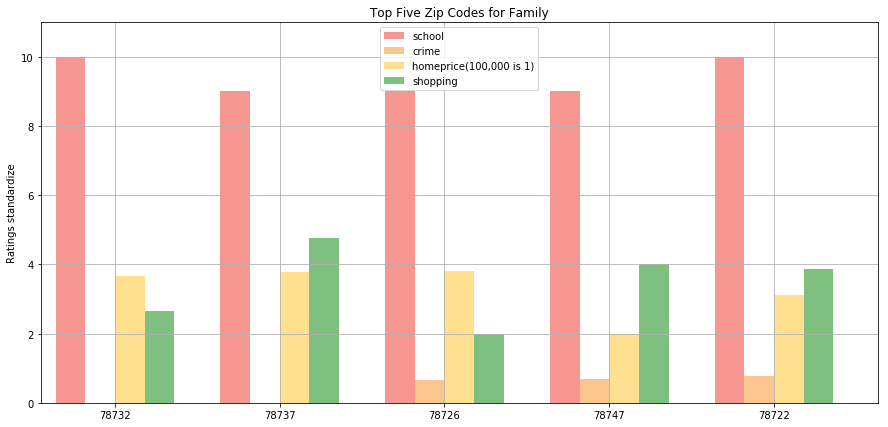

In [32]:
zipcode=[]
pos =  list(range(len(df_top_5['gsRating']))) 
width = 0.18 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df_top_5['gsRating'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df_top_5.iloc[0]['Zipcode']) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df_top_5['Crime Rating'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df_top_5.iloc[1]['Zipcode']) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df_top_5['avgsaleprice']/100000, 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df_top_5.iloc[2]['Zipcode'])

plt.bar([p + width*3 for p in pos],
        #using df['Shop Rating'] data,
        df_top_5['Shop Rating'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the first value in first_name
        label=df_top_5.iloc[3]['Zipcode']) 


# Set the y axis label
ax.set_ylabel('Ratings standardize')

# Set the chart's title
ax.set_title('Top Five Zip Codes for Family')

# Set the position of the x ticks
ax.set_xticks([p +1.5* width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_top_5['Zipcode'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(df_top_5['gsRating'])+1] )

# Adding the legend and showing the plot
plt.legend(['school', 'crime', 'homeprice(100,000 is 1)', 'shopping'], loc='best')
plt.grid()
plt.show()
fig.savefig('images\Top Five Zip Codes for Family.png')